# Data Visualization: An Hour in the Life of Air Traffic In America

**Tom Darby**  
**Data Science**  
**Spring 2020** 
**Assignment 2**  

For this assignment, we'll be using Python to map out a day's worth of recorded air traffic from a publicly available database. 

Major points of learning for this project included familiarizing myself with the basics of pandas, which is strikingly similar to working with data frames in R. Additionally, I learned how to plot simple map projections using a library called `cartopy`.

## Supporting Libraries

For this assignment, we're going to be using the `cartopy` library, which needs to be installed with `conda`:

    conda install -c anaconda cartopy
    
First, we're going to import our libraries and load our data. For libraries, we'll be using a few common libraries, like `matplotlib` and `pandas`, as well as `cartopy`, a library designed to enhance `matplotlib` with cartographic functionality.

## Dataset

Our dataset is a single day's worth of global flight data. We downloaded this data from the OpenSky Network's publicly available dataset repository at https://opensky-network.org/datasets/. 

Since the specific dataset used in this visualization is too large to include on GitHub, I'm including a link to it here, should you wish to reproduce these results:

https://opensky-network.org/datasets/states/2020-01-20/04/states_2020-01-20-04.csv.tar

This data was gathered by automatic dependent surveillance—broadcast systems, or ADS-B. ADS-B is a system for broadcasting telemetry data at regular intervals from virtually all modern passenger aircraft. Stations on the ground can listen for and record this data; from there, they can send data to central servers (like the Opensky Network) for collation and distribution.

As you can see below, the dataset includes a wealth of telemetry data. For our purposes, we're only interested in four pieces of data: `icao24`, `callsign`, `lat`, and `lon`.

In [1]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

flightDataTable = pd.read_csv('states_2020-01-20-04.csv')
print(flightDataTable.head())

         time  icao24        lat       lon    velocity     heading  vertrate  \
0  1579492800  a55e46  50.848709  3.820941  219.557322  105.631904   0.00000   
1  1579492800  484444  49.691757  5.217928  201.977423  343.272800   0.00000   
2  1579492800  a2e813  52.177917  4.727325  227.457562  121.497139  -0.32512   
3  1579492800  406ec9  52.554291  4.189606  275.550441  238.357459   0.00000   
4  1579492800  400612  49.332337  2.416125  222.442754  336.992801   0.00000   

   callsign  onground  alert    spi  squawk  baroaltitude  geoaltitude  \
0  GTI8502      False  False  False  1176.0       11582.4     11765.28   
1  KLM588       False  False  False  6760.0       12192.0     12313.92   
2  AAL716       False  False  False  2256.0       11887.2     12115.80   
3  BAW28        False  False  False  3526.0       10972.8     11239.50   
4  BAW58L       False  False  False  6757.0       11582.4     11765.28   

   lastposupdate   lastcontact  
0   1.579493e+09  1.579493e+09  
1   1.57

# Drawing the Plot

To plot out each flight during this time frame, I'll loop through my dataset using each aircraft's tail number, listed under the `icao24` column. This is the best way to uniquely identify each airplane, as not all flights will have appropriate/useable callsigns.

To make the plot more interesting, I will identify flights that are major US carriers based on their callsigns. Southwest Airlines flights will appear as purple lines, American Airlines as red, Delta Airlines as blue, and United Airlines as orange. Flights without a callsign and flights with callsigns for other carriers will be drawn as faint gray lines.

The `pandas` dataframe structure allows for easy and fast extraction of each flight's record, and `cartopy` adds some nice functionality that ensures our lines are drawn appropriately for the map projection.

call signs: 8856


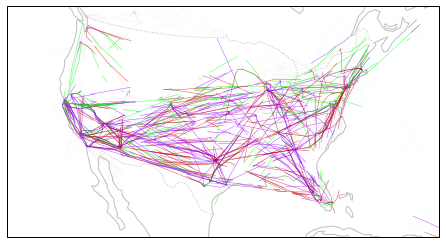

In [31]:
# MatPlotLib/cartopy initialization code taken from https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='#C0C0C0')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='#C0C0C0')


# Axes extent for continental US taken from https://stackoverflow.com/questions/53290602/how-to-use-cartopy-to-create-colored-us-states
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

# Original code follows

count=0
for workingIcao24 in flightDataTable.icao24.unique():
    lineColor = '#C0C0C0'
    
    # get the callsign listed in the first row of the icao24 (tail number) filtered results
    flightInfo = flightDataTable[flightDataTable['icao24']==workingIcao24]
    flightCallsign = flightInfo['callsign'].iloc[0]
    
    if (isinstance(flightCallsign, str) == False):
        # no callsign!
        lineColor = '#C0C0C0'
    elif (flightCallsign[:2] == 'WN' or flightCallsign[:2] == 'SW'):
        # Southwest Airlines
        lineColor = '#9900FF'
    elif (flightCallsign[:2] == 'AA'):
        # American Airlines
        lineColor = '#CC0000'
    elif (flightCallsign[:2] == 'DL'):
        # Delta Airlines
        lineColor = '#0000CC'
    elif (flightCallsign[:2] == 'UA'):
        # United Airlines
        lineColor = '#00FF00'
    if (lineColor != '#C0C0C0'):
        # plot the four major US carriers with wider lines and higher alpha...
        plt.plot(flightInfo['lon'], flightInfo['lat'], color=lineColor, alpha=0.66, linewidth=0.5, transform=ccrs.Geodetic())
    else:
        # ...and everything else with thinner lines and lower alpha.
        plt.plot(flightInfo['lon'], flightInfo['lat'], color=lineColor, alpha=0.25, linewidth=0.1, transform=ccrs.Geodetic())
    count = count + 1;
#    if (count > 1000):
#        break;
        
print("call signs: " + str(count))

plt.savefig('flightpaths.svg', format='svg')
plt.show()

# Conclusions

In the end, we get a nice-looking map of the United States with a series of lines representing the flight paths of various commercial aircraft for the hour starting at 11:00 PM Eastern on the 19th of January, 2020. All told, there were 8,856 unique tail numbers in this dataset. Even at this late hour of the day, air traffic is still quite active across the nation.

I've included this image as an SVG in the repository, and have darkened the non-major carrier flight lines for ease of viewing on this larger format.


*Bibliography/Research Sources:*
    
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

https://stackoverflow.com/questions/53290602/how-to-use-cartopy-to-create-colored-us-states

https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html

https://scitools.org.uk/cartopy/docs/v0.15/examples/features.html

https://scitools.org.uk/cartopy/docs/v0.16/matplotlib/feature_interface.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

https://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

https://matplotlib.org/gallery/lines_bars_and_markers/eventcollection_demo.html#sphx-glr-gallery-lines-bars-and-markers-eventcollection-demo-py

https://pandas.pydata.org/pandas-docs/version/0.9.1/visualization.html

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html

http://ryan-m-cooper.com/blog/gps-points-to-line-segments.html

https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.htmlhttps://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/

https://stackoverflow.com/questions/4843173/how-to-check-if-type-of-a-variable-is-string

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html
